In [59]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.layers import BatchNormalization


In [73]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# Create a simple model
model = Sequential()

# First layer (input layer): 256 neurons, input shape of 784 (for 28x28 images)
model.add(Dense(64, input_shape=(784,), activation='relu'))

# Second hidden layer: 128 neurons
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
# Output layer: 10 neurons (for classification into 10 classes)
model.add(Dense(10, activation='softmax'))
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1217 - loss: 2.3093
Test accuracy: 0.12080000340938568
Test loss: 2.3099663257598877


In [74]:
history = model.fit(
    x_train, y_train,
    epochs=5,  # Train for 10 epochs
    batch_size=32,  # Use a batch size of 32
    validation_split=0.2  # Use 20% of the training data as validation
)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8012 - loss: 0.6278 - val_accuracy: 0.9543 - val_loss: 0.1498
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9532 - loss: 0.1629 - val_accuracy: 0.9640 - val_loss: 0.1190
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9678 - loss: 0.1115 - val_accuracy: 0.9660 - val_loss: 0.1164
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9732 - loss: 0.0890 - val_accuracy: 0.9695 - val_loss: 0.1088
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9791 - loss: 0.0741 - val_accuracy: 0.9718 - val_loss: 0.0970


In [78]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {int(test_acc*100)} %")
print(f"Test loss: {test_loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9679 - loss: 0.1183
Test accuracy: 97 %
Test loss: 0.09868842363357544


In [63]:
predictions = model.predict(x_test)
print(predictions[0])  # Example prediction for the first test image


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[4.2602537e-07 2.4137523e-06 1.1031299e-05 2.2324999e-05 1.5779304e-07
 8.5299398e-06 9.6521138e-09 9.9991232e-01 1.0582016e-06 4.1638163e-05]


In [64]:
import numpy as np
import matplotlib.pyplot as plt

def show_image_with_prediction(index):
    # Reshape the flattened image back to 28x28 for display
    image = x_test[index].reshape(28, 28)

    # Get the predicted label (index of the max probability)
    predicted_label = np.argmax(predictions[index])

    # Get the true label
    true_label = np.argmax(y_test[index])

    # Plot the image
    plt.imshow(image, cmap='gray')

    # Set the title based on whether the prediction is correct or not
    title = f"True Label: {true_label}, Predicted: {predicted_label}"
    color = 'green' if predicted_label == true_label else 'red'

    plt.title(title, color=color)
    plt.axis('off')
    plt.show()



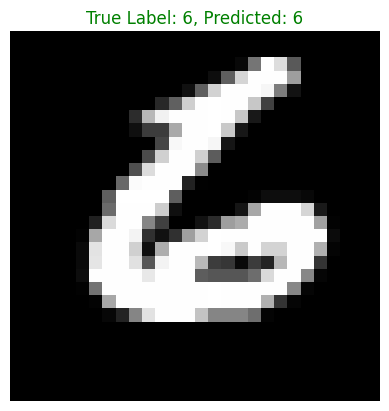

In [65]:
# Display the 0th test image with its prediction
show_image_with_prediction(-1)



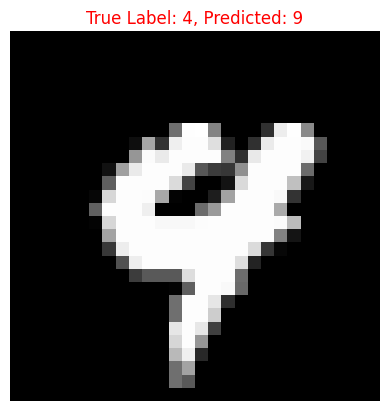

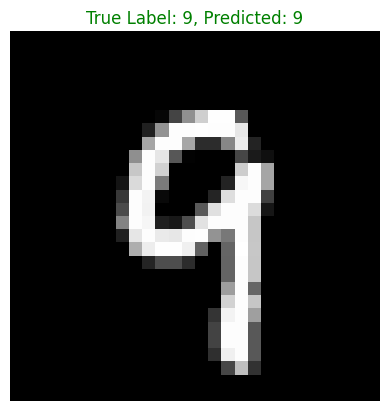

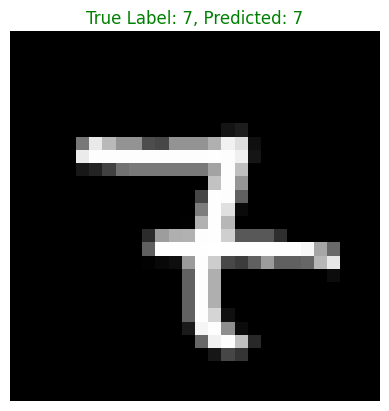

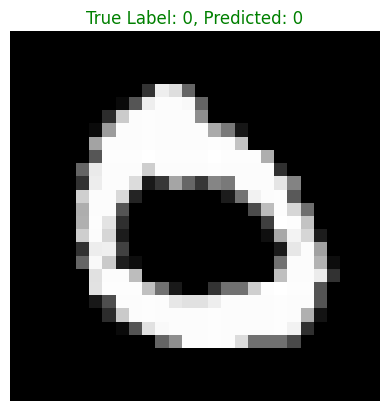

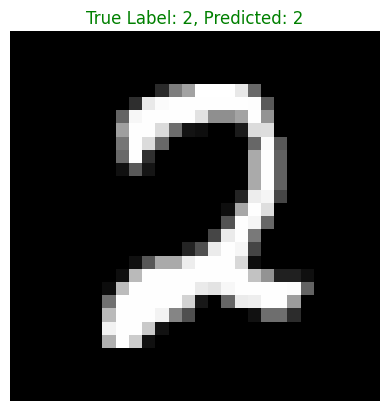

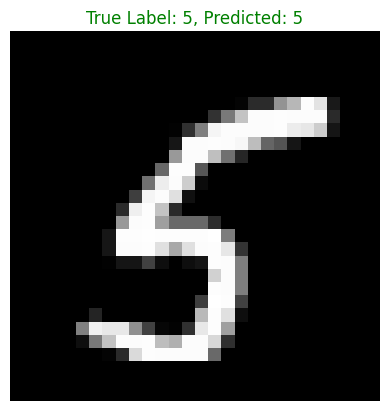

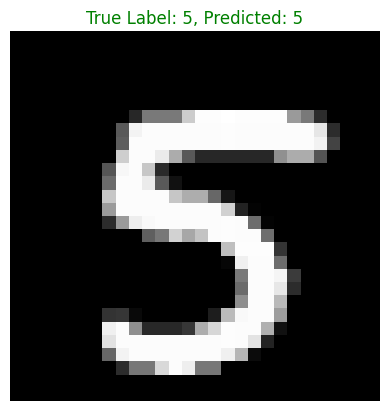

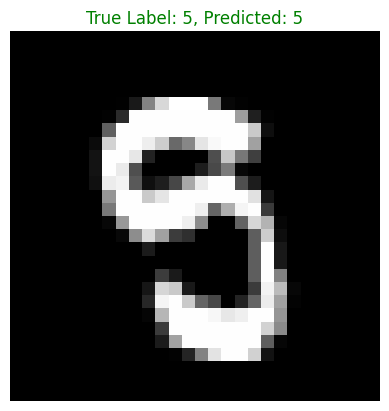

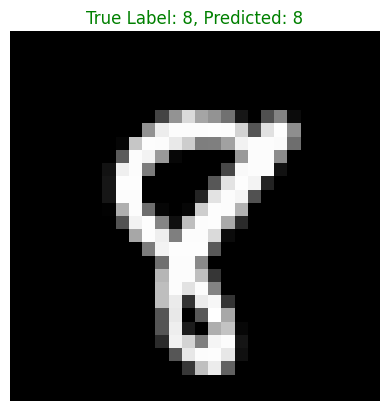

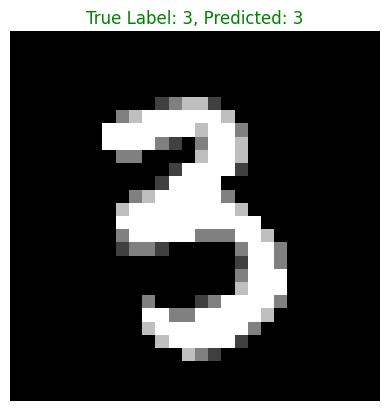

In [66]:
for i in range(10):
  show_image_with_prediction(np.random.randint(1,7000))